<a href="https://colab.research.google.com/github/JayedTamim/Thesis_Updated/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('tamim11.csv')

In [3]:
#To show the head of dataset
df.head()

,Age,ShortnessBreath,Oxygen,PulseRate,Temperature,Result
0,44,0,97,86,102,Negative
1,50,1,85,115,96,Positive
2,34,1,85,52,99,Positive
3,69,1,94,61,102,Positive
4,44,0,95,103,103,Negative


In [4]:
#count the dataset shape
df.shape

(367, 6)

In [5]:
#To show the tail of dataset
df.tail()

,Age,ShortnessBreath,Oxygen,PulseRate,Temperature,Result
362,65,0,93,90,97,Negative
363,76,0,92,102,103,Positive
364,72,0,85,79,97,Positive
365,46,1,88,109,104,Positive
366,65,0,91,94,97,Negative


# **HANDLE MISSING VALUES**

In [6]:
#count the missing values
df.isna().sum()

Age                0
ShortnessBreath    0
Oxygen             0
PulseRate          0
Temperature        0
Result             0
dtype: int64

In [7]:
#If the number of rows with missing values is small,then remove those rows.
df = df.dropna()


# Replace missing values with the mean.

In [8]:
df.fillna(df.mean(), inplace=True)


<ipython-input-8-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


# **DATA VISUALIZATION**

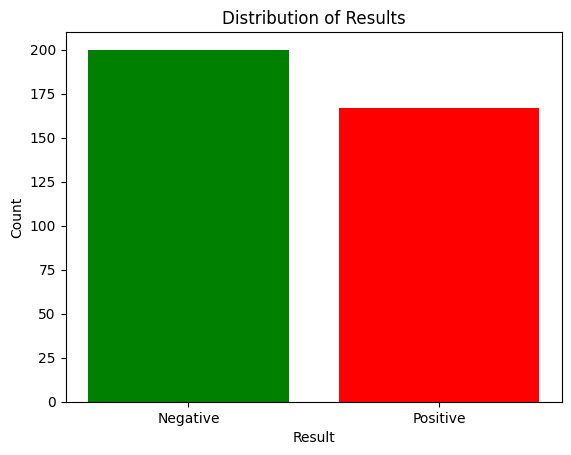

In [9]:
# Count the occurrences of each result
result_counts = df['Result'].value_counts()

# Plot the bar chart
plt.bar(result_counts.index, result_counts.values, color=['green', 'red'])
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Distribution of Results')
plt.show()


<ipython-input-10-31972b3a0ec3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


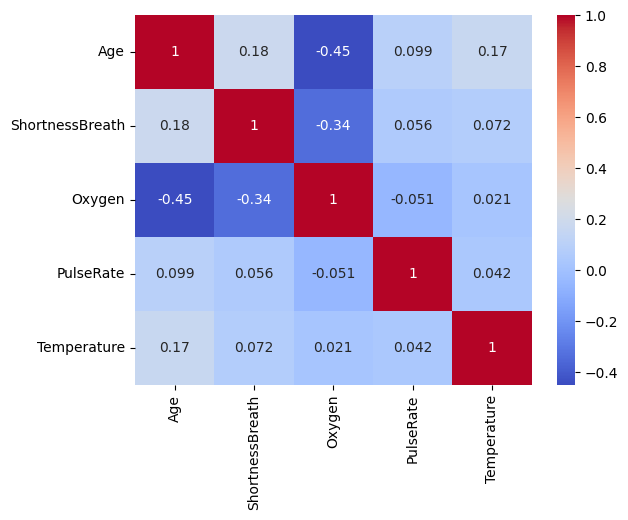

In [10]:
#Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

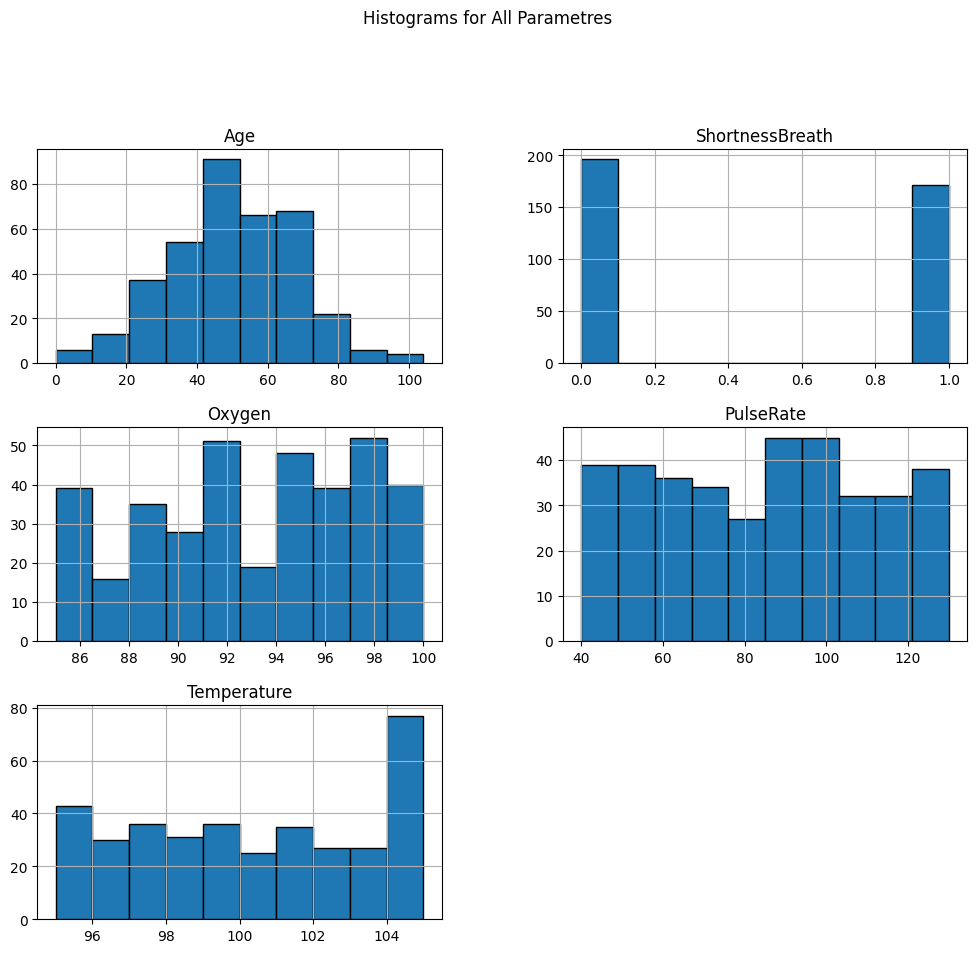

In [11]:
#HISTOGRAM

# DataFrame called 'df'
df.hist(figsize=(12, 10), bins=10,edgecolor='black')
plt.suptitle("Histograms for All Parametres", y=1.02)
plt.show()


# **PRE PROCESS THE DATASET**

In [12]:
df['Result'].replace(['Positive', 'Negative'], [1, 0], inplace=True)


In [13]:
df['Result'].unique()

array([0, 1])

# **TRAIN DATASET AND FIND ACCURACY**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
#dataset is stored in a DataFrame called 'df'
X = df[['Age', 'ShortnessBreath', 'Oxygen', 'PulseRate', 'Temperature']]
y = df['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_percentage_rf = accuracy_rf * 100

print(f"Random Forest Test Accuracy: {accuracy_percentage_rf:.2f}%")

Random Forest Test Accuracy: 97.30%


# **SHOW CONFUSION MATRIX**

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

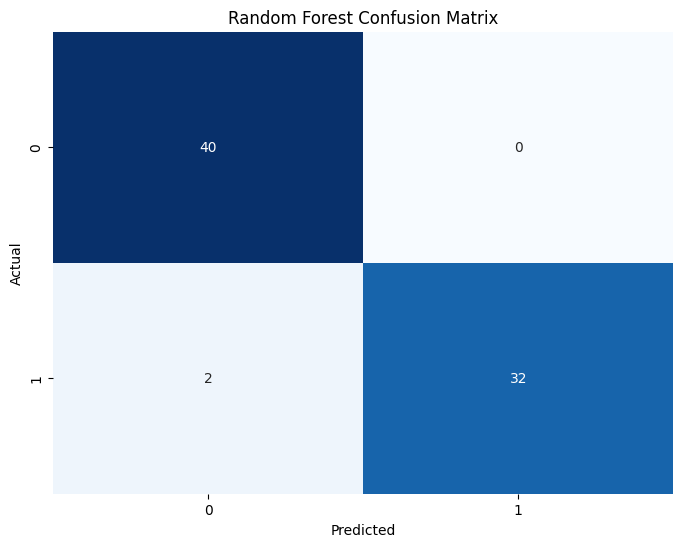

In [17]:
# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
